In [13]:
# Import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [18]:
# Data Pre-processing
df = pd.read_csv('stroke_prediction_dataset.csv')
# Drop the Null values
df = df.dropna()
# Drop the 'Patient ID', 'Patient Name' columns
df = df.drop(columns=['Patient ID', 'Patient Name'], axis=1)
# Assign dummy variables to the 'Gender' column
dummies1 = pd.get_dummies(df['Gender'], dtype=int)
clean_df = pd.concat([dummies1, df], axis=1)
clean_df = clean_df.drop(columns='Gender')
# # Assign dummy variables to the 'Diagnosis' column
# dummies2 = pd.get_dummies(df['Diagnosis'], dtype=int)
# clean_df = pd.concat([dummies2, df], axis=1).rename(columns={'no': 'no_stroke', 'yes': 'stroke'})
# clean_df = clean_df.drop(columns='Diagnosis')
# Modify the 'Cholesterol Levels', 'Blood Pressure Levels' columns
clean_df['Lower Blood Pressure'] = clean_df['Blood Pressure Levels'].str.split('/', expand=True)[0]

clean_df['Higher Blood Pressure'] = clean_df['Blood Pressure Levels'].str.split('/', expand=True)[1]

clean_df = clean_df.drop(columns='Blood Pressure Levels')

clean_df['HDL'] = clean_df['Cholesterol Levels'].str.split(",", expand=True)[0]
clean_df['HDL'] = clean_df['HDL'].str.split(':', expand=True)[1]

clean_df['LDL'] = clean_df['Cholesterol Levels'].str.split(",", expand=True)[1]
clean_df['LDL'] = clean_df['LDL'].str.split(':', expand=True)[1]

clean_df = clean_df.drop(columns='Cholesterol Levels', axis=1)
clean_df

,Female,Male,Age,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),...,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Symptoms,Diagnosis,Lower Blood Pressure,Higher Blood Pressure,HDL,LDL
0,0,1,56,0,1,Married,Self-employed,Rural,130.91,22.37,...,0,Yes,Vegan,3.48,"Difficulty Speaking, Headache",Stroke,140,108,68,133
1,0,1,80,0,0,Single,Self-employed,Urban,183.73,32.57,...,0,No,Paleo,1.73,"Loss of Balance, Headache, Dizziness, Confusion",Stroke,146,91,63,70
2,0,1,26,1,1,Married,Never Worked,Rural,189.00,20.32,...,0,Yes,Paleo,7.31,"Seizures, Dizziness",Stroke,154,97,59,95
3,0,1,73,0,0,Married,Never Worked,Urban,185.29,27.50,...,0,No,Paleo,5.35,"Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke,174,81,70,137
4,0,1,51,1,1,Divorced,Self-employed,Urban,177.34,29.06,...,0,Yes,Pescatarian,6.84,Difficulty Speaking,Stroke,121,95,65,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,1,0,79,0,1,Divorced,Private,Rural,82.69,36.82,...,1,Yes,Vegetarian,8.69,"Headache, Weakness",No Stroke,100,99,60,65
14996,1,0,47,0,0,Married,Private,Urban,107.58,22.17,...,1,No,Gluten-Free,1.47,Difficulty Speaking,No Stroke,155,71,35,183
14997,0,1,35,0,0,Married,Government Job,Rural,134.90,26.38,...,1,No,Paleo,0.51,"Difficulty Speaking, Severe Fatigue, Headache",Stroke,121,110,57,159
14998,0,1,73,0,0,Single,Self-employed,Urban,169.42,28.32,...,0,Yes,Paleo,1.53,"Severe Fatigue, Numbness, Confusion, Dizziness...",No Stroke,157,74,79,91


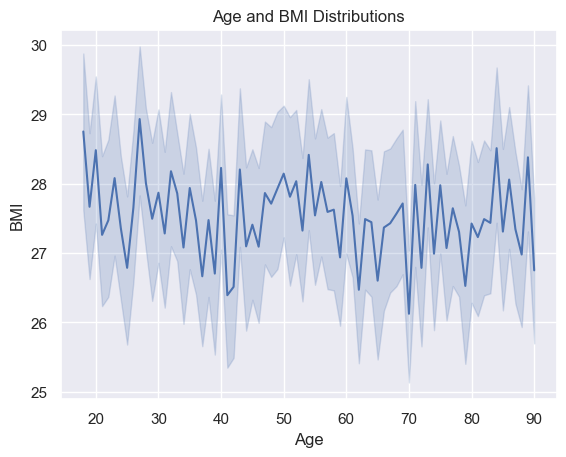

In [67]:
# Data Visualization 1: Age and BMI Distributions
sns.lineplot(clean_df, x='Age', y='Body Mass Index (BMI)')
plt.title("Age and BMI Distributions")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

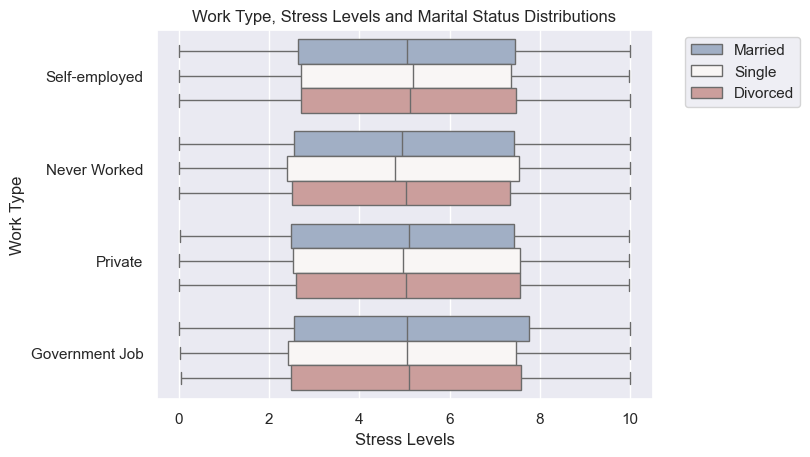

In [103]:
# Data Visualization 2: Work Type, Stress Levels and Marital Status Distributions
sns.boxplot(clean_df, x='Stress Levels', y='Work Type', hue='Marital Status', orient='h', palette="vlag")
plt.title("Work Type, Stress Levels and Marital Status Distributions")
plt.xlabel("Stress Levels")
plt.ylabel("Work Type")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

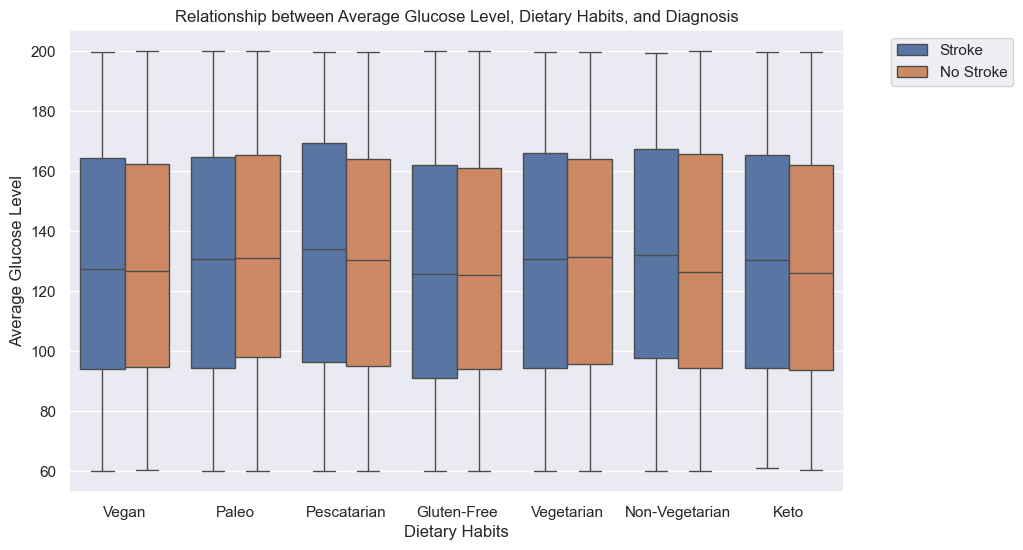

In [104]:
# Data Visualization 3: The Relationship between Average Glucose Level, Dietary Habits, and Diagnosis
plt.figure(figsize=(10,6))
sns.boxplot(data=clean_df, x="Dietary Habits", y="Average Glucose Level", hue="Diagnosis")
plt.title("Relationship between Average Glucose Level, Dietary Habits, and Diagnosis")
plt.xlabel("Dietary Habits")
plt.ylabel("Average Glucose Level")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

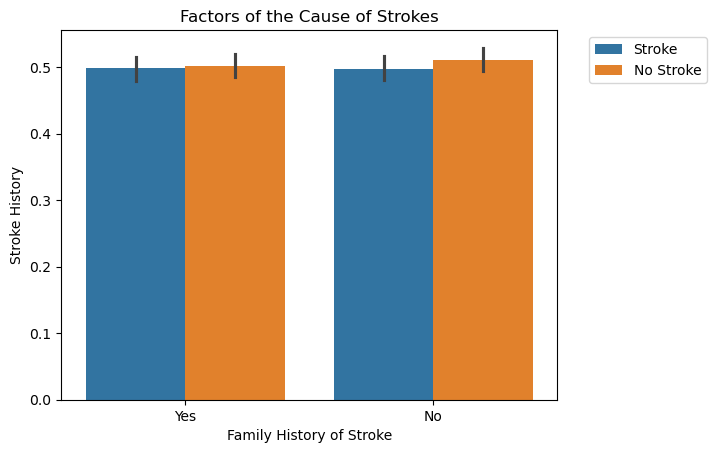

In [ ]:
# Data Visualization 4: Stroke History
sns.barplot(data=clean_df,x="Family History of Stroke", y="Stroke History", hue="Diagnosis")
plt.title("Factors of the Cause of Strokes")
plt.xlabel("Family History of Stroke")
plt.ylabel("Stroke History")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [39]:
categorical_cols = ['ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoders = {}
for col in categorical_cols:
   le = LabelEncoder()
   clean_df[col] = le.fit_transform(df[col])
   label_encoders[col] = le

X = clean_df.drop(["stroke", "AgeRange"], axis=1)
y = clean_df["stroke"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
   X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[673   0]
 [ 40   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       673
           1       0.00      0.00      0.00        40

    accuracy                           0.94       713
   macro avg       0.47      0.50      0.49       713
weighted avg       0.89      0.94      0.92       713

ROC-AUC Score: 0.7794576523031204
Accuracy: 0.9438990182328191


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
